# Assignment 3

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 

In [60]:
# libraries for dataset preparation, feature engineering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(123) #for reprodicible results
%matplotlib inline

## 2 - Dataset preparation ##

The dataset is collected from this kaggle compettion: https://www.kaggle.com/c/learn-ai-bbc/data

The dataset contains 1117 news article from the BBC News and each of them are classified into one of the following categories: bussiness, tech, politics, sport, entertainment.

The model built for this dataset modified the original example of neural network assignment. Instead of classifying just 2 type news, this model classifies all 5 mentioned categories of news.

In [61]:
df = pd.read_csv('bbc_news_train.csv')

In [62]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [63]:
labels_num = df.Category.unique()
print(labels_num)
business = df[df['Category'] == 'business'].shape[0]
tech = df[df['Category'] == 'tech'].shape[0]
politics = df[df['Category'] == 'politics'].shape[0]
sport = df[df['Category'] == 'sport'].shape[0]
entertainment = df[df['Category'] == 'entertainment'].shape[0]
print('Number of business documents: %s' %business)
print('Number of tech documents: %s' %tech)
print('Number of politics documents: %s' %politics)
print('Number of sport documents: %s' %sport)
print('Number of entertainment documents: %s' %entertainment)

['business' 'tech' 'politics' 'sport' 'entertainment']
Number of business documents: 336
Number of tech documents: 261
Number of politics documents: 274
Number of sport documents: 346
Number of entertainment documents: 273


In [64]:
df['Text'][5]

'howard  truanted to play snooker  conservative leader michael howard has admitted he used to play truant to spend time with his school friends at a snooker hall.  mr howard said his time at jack s snooker hall in llanelli in the 1950s had not done him  any lasting damage . but he told the times educational supplement that truancy was  very bad  and said  firm action  was needed. mr howard also called for a return to o-levels and more classroom discipline.  mr howard eventually left llanelli grammar school - and the snooker hall - to go to cambridge university. he said:  i don t think it s done me any lasting damage. nor has it made me a snooker world champion.  there might have been some occasions when we left early of an afternoon.   i m just being honest. i think truancy is a very bad thing and that firm action should be taken to deal with it.  another player who has failed to win snooker s world championship - jimmy  the whirlwind   white - has previously admitted missing lessons  

Next, we will split the dataset into training and test sets so that we can train and test classifier. Also, we will encode our target column so that it can be used in our model.

In [65]:
# split the dataset into training and test datasets 
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['Text'], df['Category'])

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y.values)
test_y = encoder.fit_transform(test_y.values)

The next step is the feature engineering step. In this step, raw text data will be transformed into feature vectors and new features will be created using the existing dataset.

### TF-IDF Vectors as features
TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

In [66]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['Text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xtest_tfidf =  tfidf_vect.transform(test_x)

In [67]:
# Getting transformed training and testing dataset
print('Number of training documents: %s' %str(xtrain_tfidf.shape[0]))
print('Number of testing documents: %s' %str(xtest_tfidf.shape[0]))
print('Number of features of each document: %s' %str(xtrain_tfidf.shape[1]))
print('xtrain_tfidf shape: %s' %str(xtrain_tfidf.shape))
print('train_y shape: %s' %str(train_y.shape))
print('xtest_tfidf shape: %s' %str(xtest_tfidf.shape))
print('test_y shape: %s' %str(test_y.shape))

Number of training documents: 1117
Number of testing documents: 373
Number of features of each document: 5000
xtrain_tfidf shape: (1117, 5000)
train_y shape: (1117,)
xtest_tfidf shape: (373, 5000)
test_y shape: (373,)


In [68]:
### START CODE HERE ###
train_y = np.expand_dims(train_y, axis=0)
test_y = np.expand_dims(test_y, axis=0)

# for convenience in this exercise, we also use toarray() to convert sparse to dense matrix 
xtrain_tfidf =  xtrain_tfidf.T.toarray() 
xtest_tfidf =  xtest_tfidf.T.toarray()
### END CODE HERE ###
xtrain_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02075747, 0.        , 0.02915101, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [69]:
# New shape 
print('xtrain_tfidf shape: %s' %str(xtrain_tfidf.shape))
print('train_y shape: %s' %str(train_y.shape))
print('xtest_tfidf shape: %s' %str(xtest_tfidf.shape))
print('test_y shape: %s' %str(test_y.shape))

xtrain_tfidf shape: (5000, 1117)
train_y shape: (1, 1117)
xtest_tfidf shape: (5000, 373)
test_y shape: (1, 373)


## 3 - Building model ##

In [70]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

Initializing the parameters with random values

In [71]:
def initialize(input_num, output_num=1, epsilon_init=0.12):
    """
    This function creates a matrix of shape (input_num, output_num) for w and initializes b. 
    
    Argument:
    input_num -- previous layer's nodes
    output_num -- next layer's nodes
    
    Returns:
    w -- initialized matrix of shape (input_num, output_num)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((input_num, output_num))
    b = np.zeros((output_num, 1))
    
    epsilon_init = np.sqrt(6)/np.sqrt(input_num + output_num)
    w = np.random.rand(input_num, output_num) * 2 * epsilon_init - epsilon_init
    b = np.random.rand(output_num , 1) * 2 * epsilon_init - epsilon_init
    ### END CODE HERE ###
    return w, b

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [72]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights
    b -- bias
    X -- data
    Y -- true "label"

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = np.float(X.shape[1])
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T,X) + b)                                    # compute activation
    cost = -(1/m) * (np.sum((Y*np.log(A))+ ((1-Y)*np.log(1-A))))     # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m)*(np.dot(X,(A-Y).T))
    db = (1/m)*(np.sum(A-Y, axis=1))
    ### END CODE HERE ###
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [73]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights
    b -- bias
    X -- data 
    Y -- true "label"
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w,b,X,Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"].reshape(-1,1)
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [74]:
def predict(w, b, X):
    '''
    Predict whether the label using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias
    X -- data of size
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions for the examples in X
    '''
    
    m = X.shape[1]
    
    # Compute vector "A" predicting the probabilities of a news being present
    ### START CODE HERE ### (≈ 1 line of code)
    A = np.argmax(sigmoid(np.dot(w.T,X) + b), axis=0).reshape(1,-1)
    ### END CODE HERE ###
    return A

<font color='blue'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

In [75]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set
    Y_train -- training labels 
    X_test -- test set
    Y_test -- test labels
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    oneHotEncoder = preprocessing.OneHotEncoder(sparse=False)
    train_y_en = oneHotEncoder.fit_transform(Y_train.reshape(-1,1)).T
    test_y_en = oneHotEncoder.fit_transform(Y_test.reshape(-1,1)).T
    
    input_num = X_train.shape[0]
    output_num = train_y_en.shape[0]
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize(input_num, output_num)

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, train_y_en, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [76]:
d = model(xtrain_tfidf, train_y, xtest_tfidf, test_y, num_iterations = 3000, learning_rate = .5, print_cost = True)

Cost after iteration 0: 3.462307
Cost after iteration 100: 2.202362
Cost after iteration 200: 1.958701
Cost after iteration 300: 1.758287
Cost after iteration 400: 1.593217
Cost after iteration 500: 1.456272
Cost after iteration 600: 1.341510
Cost after iteration 700: 1.244276
Cost after iteration 800: 1.160991
Cost after iteration 900: 1.088920
Cost after iteration 1000: 1.025960
Cost after iteration 1100: 0.970484
Cost after iteration 1200: 0.921220
Cost after iteration 1300: 0.877164
Cost after iteration 1400: 0.837515
Cost after iteration 1500: 0.801626
Cost after iteration 1600: 0.768972
Cost after iteration 1700: 0.739119
Cost after iteration 1800: 0.711710
Cost after iteration 1900: 0.686446
Cost after iteration 2000: 0.663074
Cost after iteration 2100: 0.641381
Cost after iteration 2200: 0.621185
Cost after iteration 2300: 0.602329
Cost after iteration 2400: 0.584679
Cost after iteration 2500: 0.568117
Cost after iteration 2600: 0.552541
Cost after iteration 2700: 0.537861
Cost

Let's also plot the cost function and the gradients.

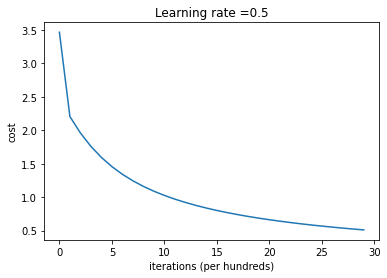

In [77]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

## 6 - Further analysis ##

learning rate is: 0.01
train accuracy: 24.52999104744852 %
test accuracy: 19.302949061662204 %

-------------------------------------------------------

learning rate is: 0.1
train accuracy: 93.82273948075202 %
test accuracy: 90.0804289544236 %

-------------------------------------------------------

learning rate is: 0.5
train accuracy: 98.11996418979409 %
test accuracy: 93.5656836461126 %

-------------------------------------------------------



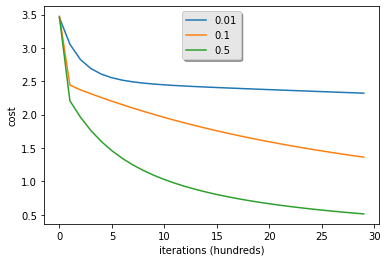

In [78]:
learning_rates = [0.01, 0.1, 0.5]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(xtrain_tfidf, train_y, xtest_tfidf, test_y, num_iterations = 3000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()